<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"></ul></div>

In [1]:
from apps.lib import Sensor, Performance, Model
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm

SONG = 1
TRAIN_ORDER = 3

In [2]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [3]:
sensor_data = Sensor(verbose=1)

In [4]:
def gogo(who_id, song_id, train_pf_order):
    train_pf = Performance(sensor_data, who_id, song_id, train_pf_order, 4, 4)
    
    pfs = []
    for pf_order in tqdm(range(1, 3 + 1)):
        if pf_order == train_pf_order:
            pfs.append(train_pf)
        else:
            pfs.append(Performance(sensor_data, who_id, song_id, pf_order, 4, 4)) 
            
    return pfs

In [5]:
pfs = []
for drumer in range(1, 8 + 1):
    ppf = gogo(drumer, SONG, TRAIN_ORDER)
    pfs.append(ppf)

100%|██████████| 3/3 [00:50<00:00, 16.70s/it]


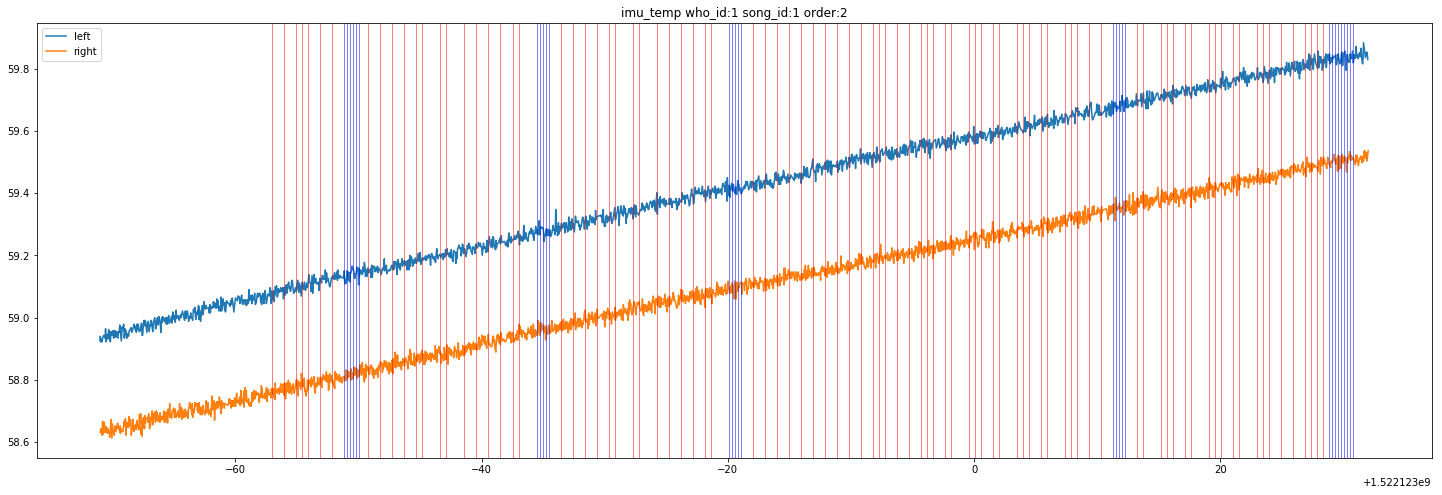

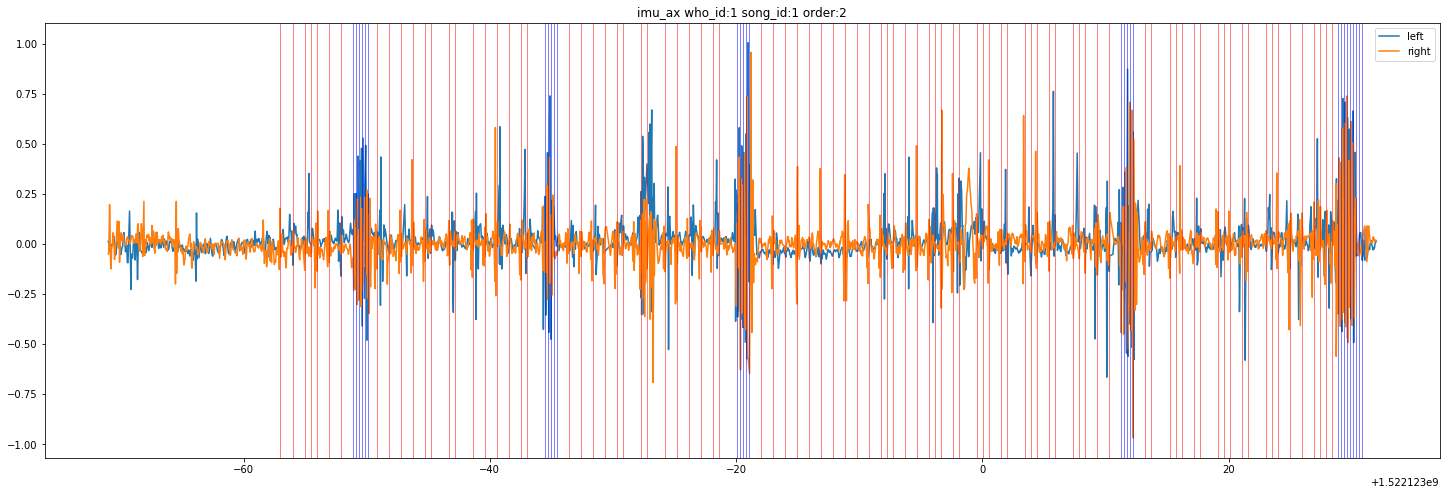

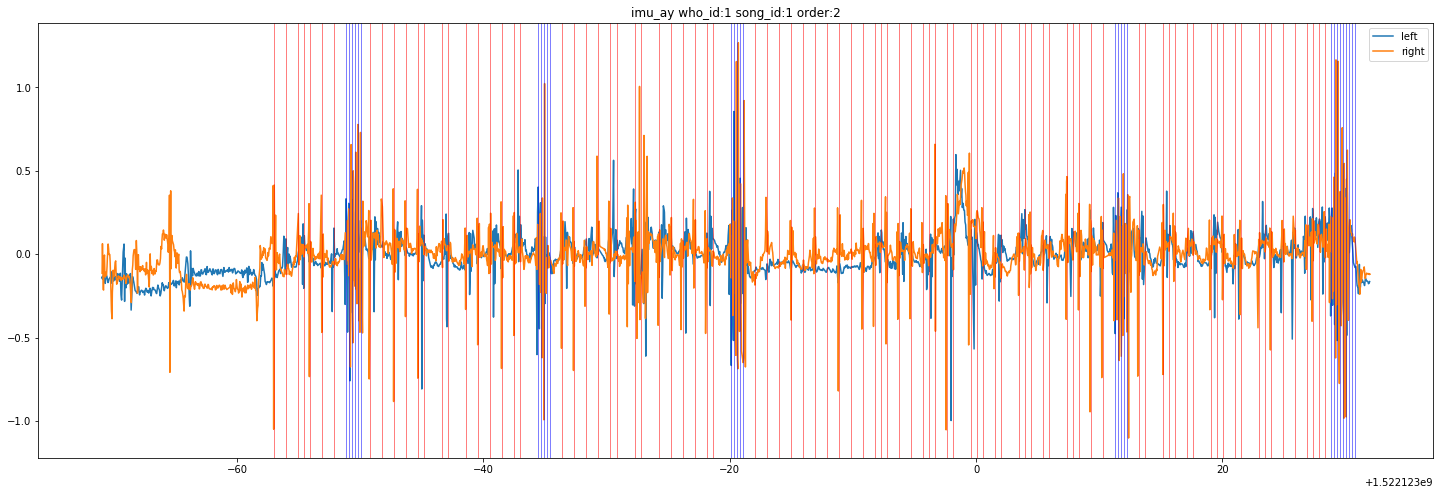

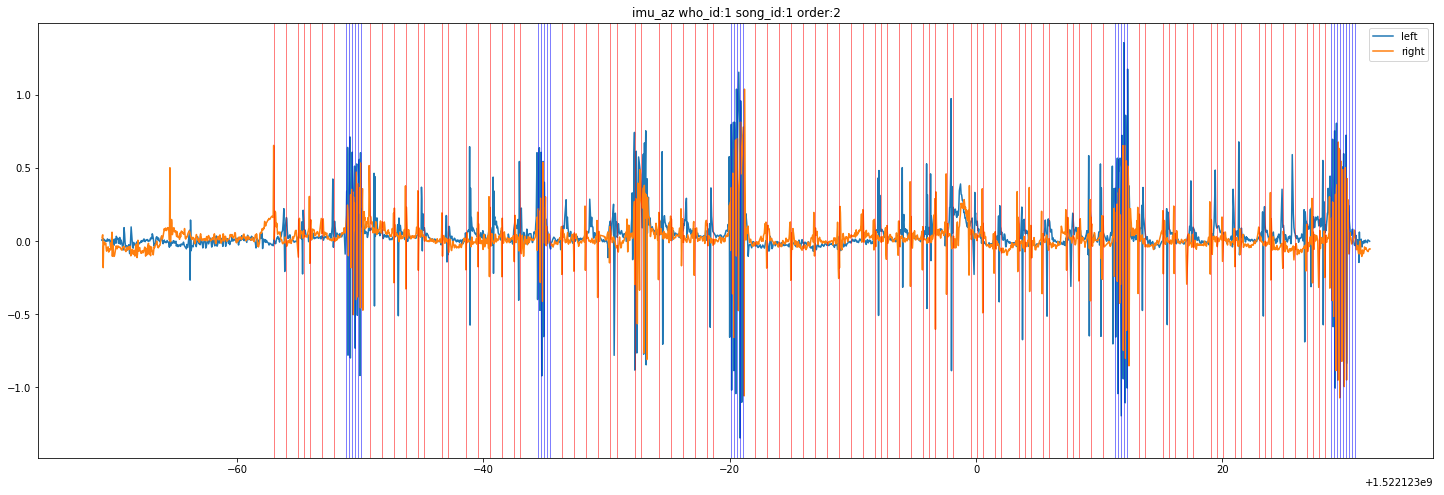

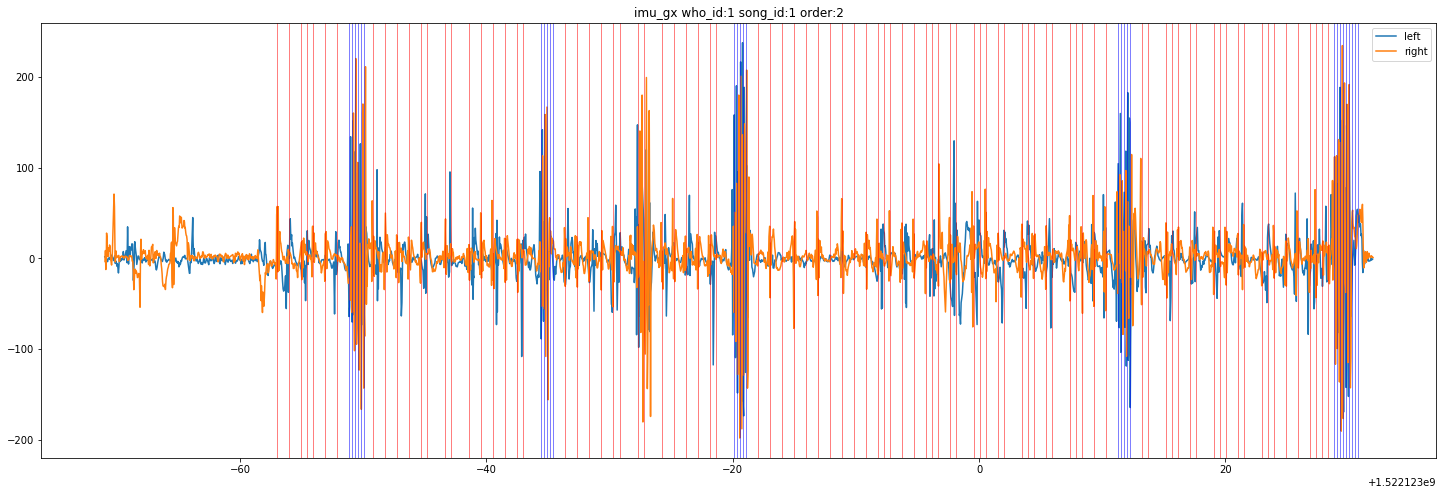

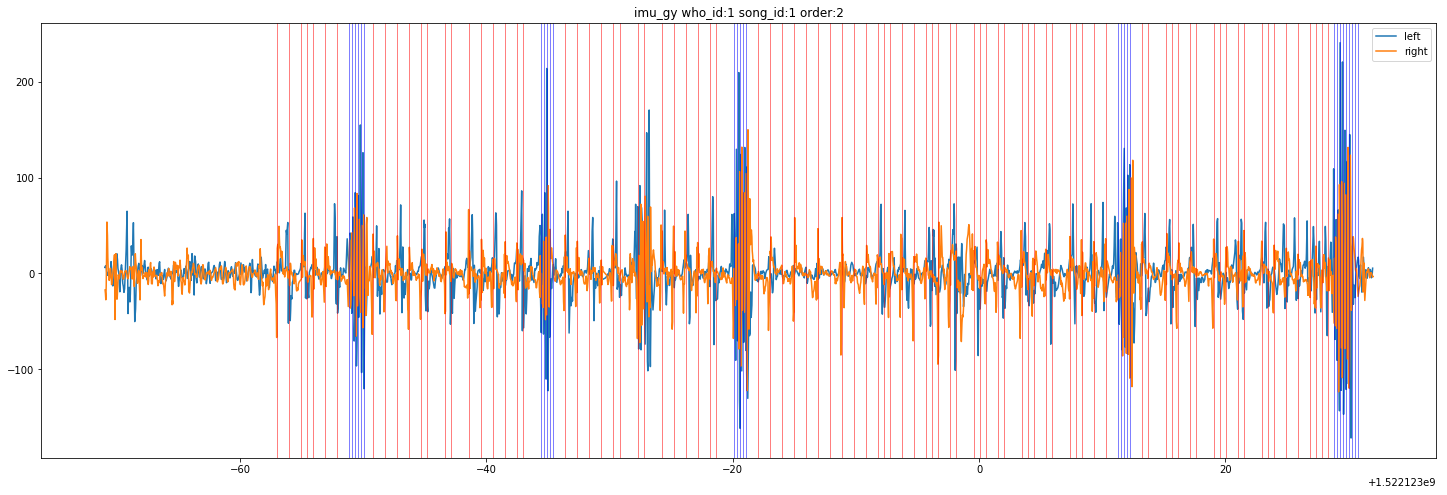

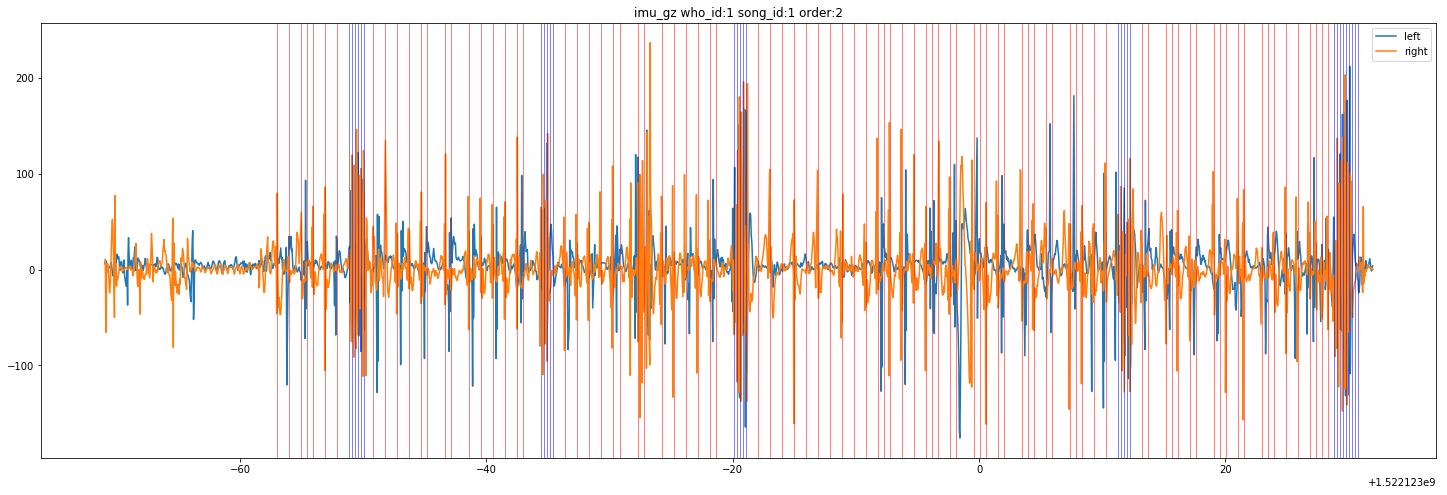

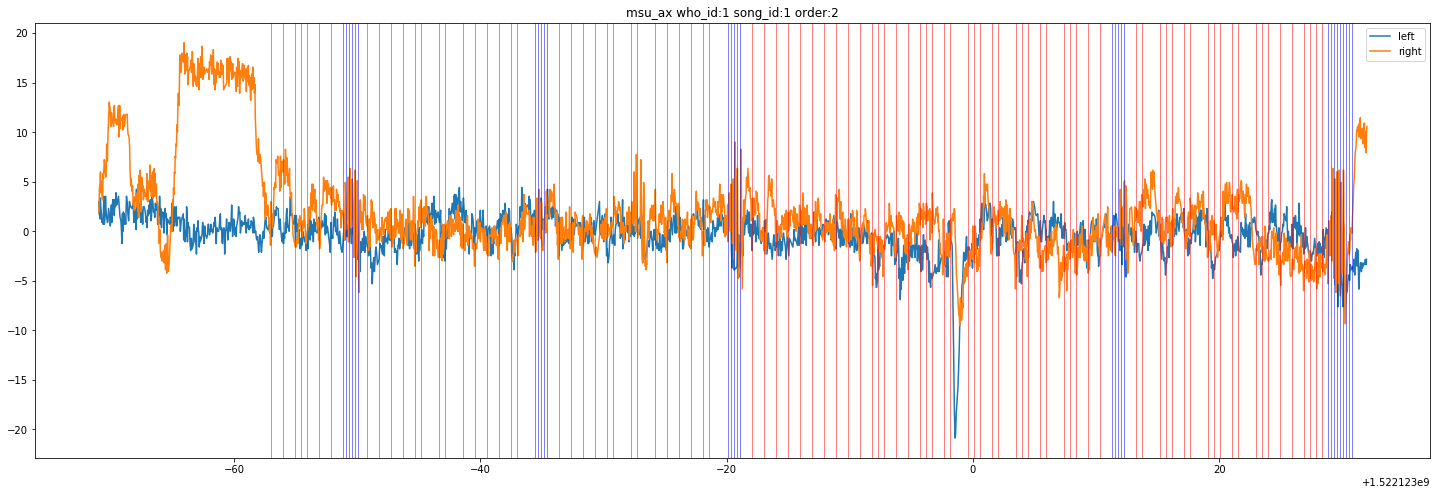

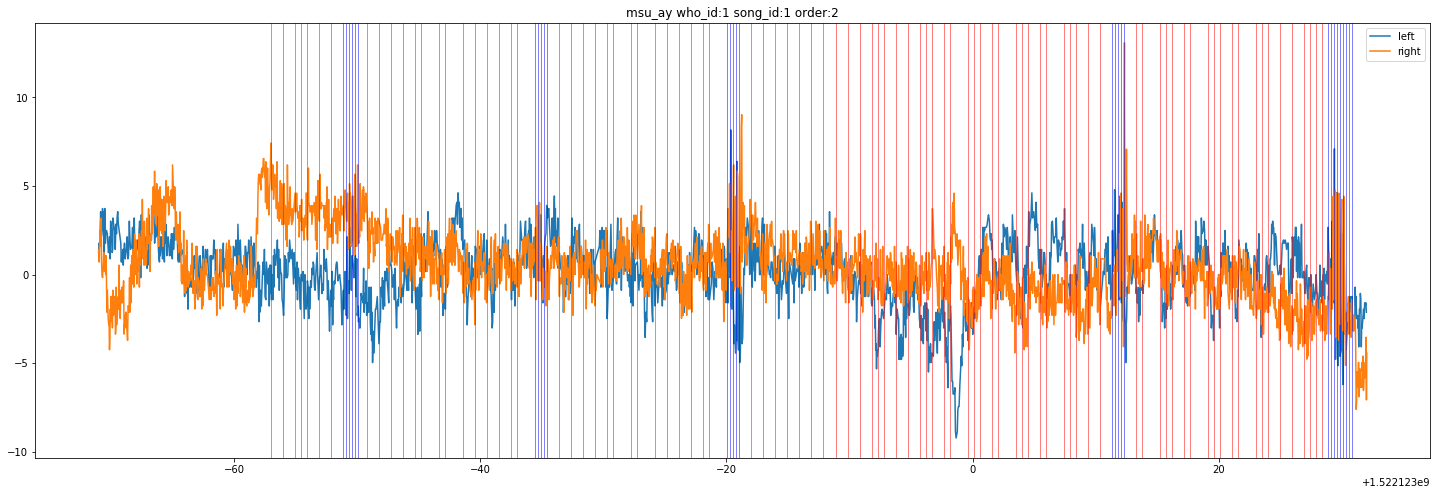

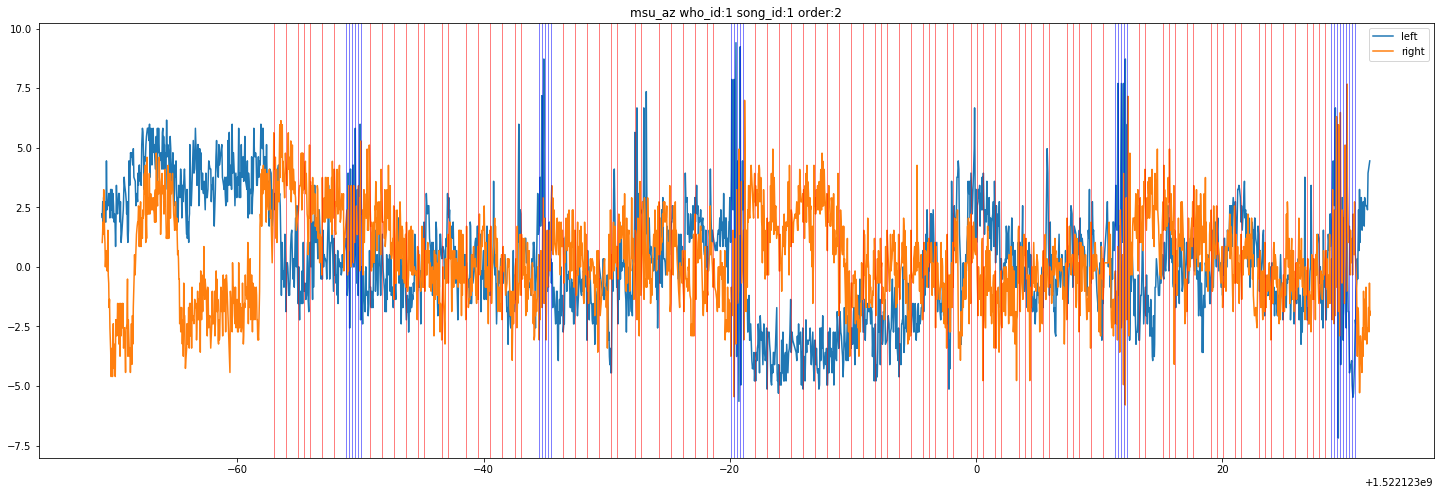

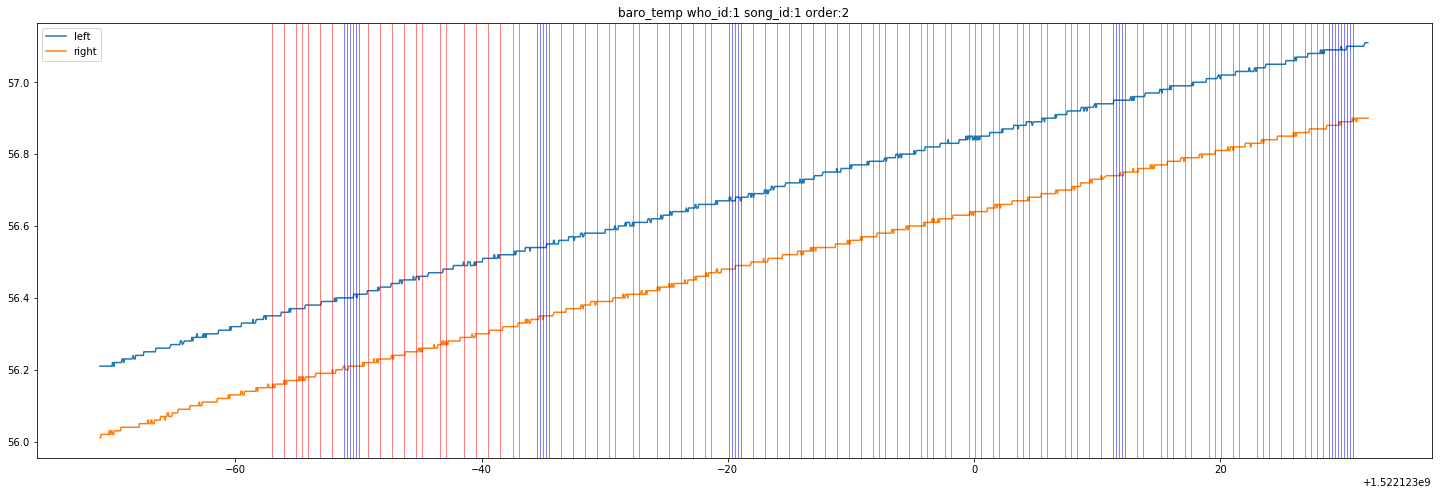

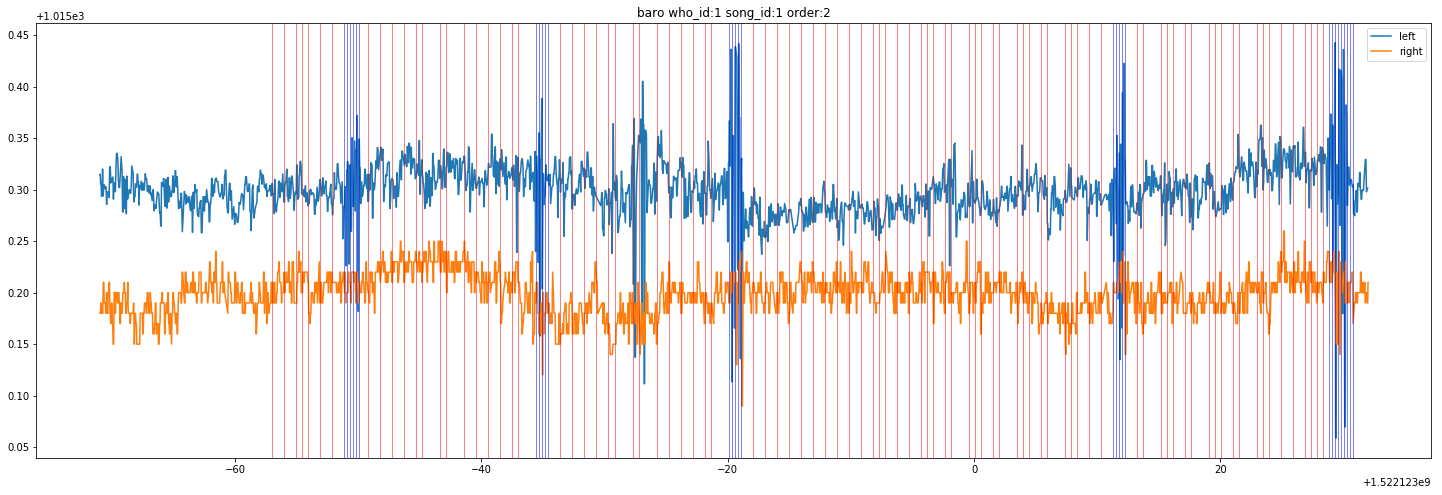

In [6]:
pfs[0][1].plot_global_event()

In [7]:
pfs[0][1].primitive_df

,L_AAI,L_AVI,L_ASMA,L_GAI,L_GVI,L_GSMA,L_AAE,L_ARE,L_MAMI,L_MGMI,...,R_AZCR,R_GZCR,R_AMCR,R_GMCR,R_AXYCORR,R_AYZCORR,R_AZXCORR,R_GXYCORR,R_GYZCORR,R_GZXCORR
0,0.140397,4.579471e-05,0.164000,10.637101,1.978204,15.705500,0.019757,115.126117,0.138868,10.496835,...,0.500000,0.250000,0.250000,0.250000,-0.697738,0.765694,-0.850848,0.089004,0.253606,0.740245
1,0.141950,1.906556e-04,0.171000,5.548620,0.715454,8.666333,0.020340,31.502636,0.134451,5.023403,...,0.333333,0.333333,0.333333,0.666667,-0.976483,0.991452,-0.996265,-0.171004,-0.858261,-0.358888
2,0.161226,1.907542e-04,0.169500,2.608684,0.151642,3.720000,0.026184,6.956876,0.161226,2.608684,...,0.500000,0.500000,0.500000,0.500000,-0.647841,0.311905,-0.394536,-0.651006,0.889720,-0.234136
3,0.138375,1.707407e-04,0.168333,4.622889,0.452971,6.836000,0.019318,21.824072,0.136810,4.209783,...,0.333333,0.333333,0.333333,0.333333,-0.950406,0.998113,-0.929518,-0.883935,0.999408,-0.899493
4,0.164102,2.830190e-05,0.201000,8.905904,17.480866,13.514333,0.026958,96.795988,0.164469,7.623020,...,0.500000,0.250000,0.500000,0.250000,-0.937418,0.474095,-0.298646,0.559264,-0.910884,-0.180358
5,0.146004,2.837602e-05,0.191500,14.312957,0.048949,20.584000,0.021346,204.909692,0.146004,14.312957,...,0.250000,0.500000,0.250000,0.500000,-0.987471,0.788069,-0.690933,0.978676,-0.961000,-0.978412
6,0.152365,5.159815e-04,0.176000,3.658420,0.009603,5.115000,0.023731,13.393642,0.152365,3.658420,...,0.333333,0.333333,0.333333,0.333333,0.805837,-0.422691,-0.877258,0.958875,-0.988381,-0.904593
7,0.133660,5.363782e-04,0.158667,9.015112,27.293341,14.732333,0.018401,108.565594,0.135263,7.300487,...,0.250000,0.750000,0.250000,0.750000,-0.968838,0.372034,-0.322342,0.338583,0.075824,0.624909
8,0.151201,9.516131e-05,0.194333,21.562918,20.558165,35.614000,0.022957,485.517599,0.153154,20.482507,...,0.250000,0.250000,0.250000,0.250000,-0.400180,0.975802,-0.575965,-0.543528,0.146506,-0.805704
9,0.153191,2.577375e-06,0.188667,16.474725,12.589811,23.839000,0.023470,284.006370,0.153300,15.358032,...,0.333333,0.666667,0.333333,0.666667,-0.998251,-0.709889,0.667015,0.904142,-0.894555,-0.999759


In [8]:
def cutstom_output_cnf_matrix(y, pred_y):
    cnf_matrix = confusion_matrix(y, pred_y)
    
    # Plot normalized confusion matrix
    plt.figure(figsize=(10, 10))
    plot_confusion_matrix(cnf_matrix, classes=[1, 2], normalize=True,
                          title='Normalized confusion matrix')
    plt.show()

!!!!!!!!! test 1-th drumer !!!!!!!!!!!!
[[ 1.36597207 -0.29783408  1.23635942 ... -1.22163896  1.30692027
  -1.135661  ]
 [ 1.39568998 -0.29201275  1.20989969 ...  0.86946576  1.26369796
   1.20097462]
 [ 1.28464338 -0.29939901  1.1233042  ... -0.79852999  0.90256784
  -0.3786311 ]
 ...
 [-0.13752917 -0.26447998 -0.07620361 ... -1.19001087  1.27593397
  -1.13851421]
 [-0.31126132 -0.28357389 -0.22854752 ...  1.24945671 -1.02658331
  -1.07874613]
 [ 0.19600371 -0.22308822  0.10981632 ...  1.42797354  1.30716843
   1.51230501]]


100%|██████████| 361/361 [00:32<00:00, 10.97it/s]

let's go centroid=50, C=100.00 @@@@@@@@@@@@@@@
predicting 1 performance



100%|██████████| 361/361 [00:32<00:00, 11.08it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.98901099 0.01098901]
 [0.36666667 0.63333333]]


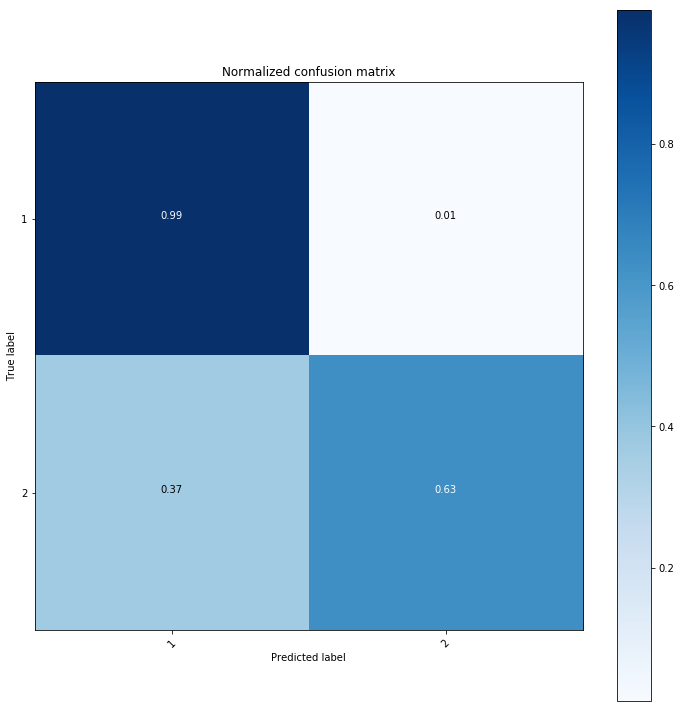

predicting 2 performance


100%|██████████| 361/361 [00:32<00:00, 11.08it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.97802198 0.02197802]
 [0.46666667 0.53333333]]


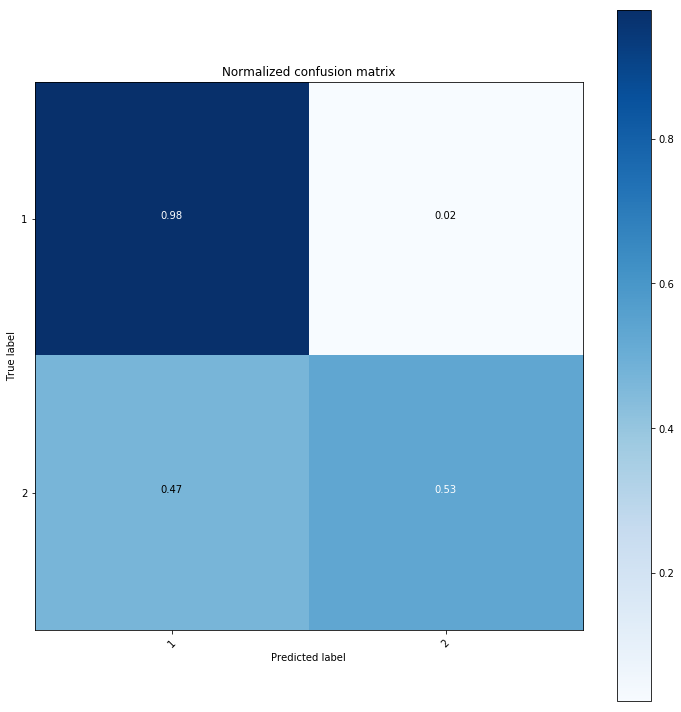

predicting 3 performance


100%|██████████| 361/361 [00:32<00:00, 11.03it/s]


============ prediction arm ============
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


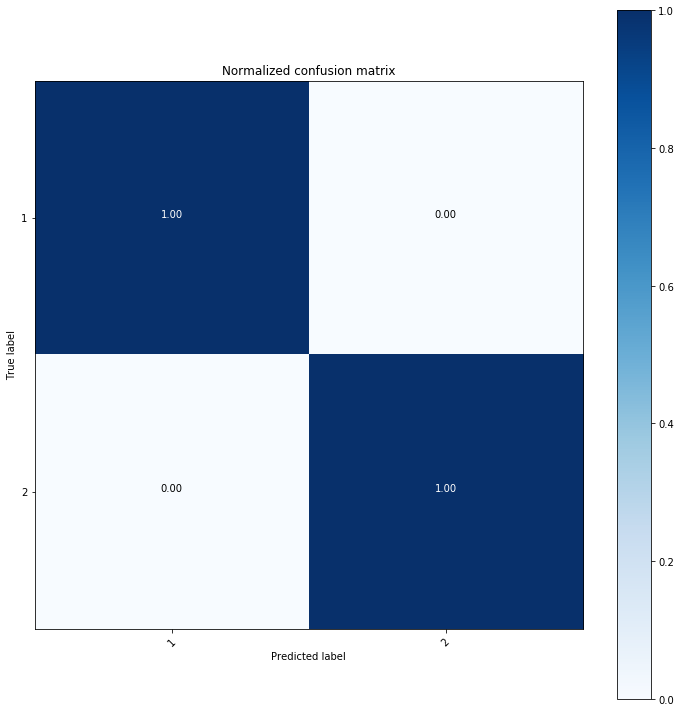

!!!!!!!!! test 2-th drumer !!!!!!!!!!!!
[[-0.37872786 -0.20721804 -0.35825737 ...  0.66429244 -1.3977613
  -1.88587314]
 [-0.38692339 -0.20652708 -0.36560561 ...  0.5996997  -0.1447132
   0.2344801 ]
 [-0.37322814 -0.20629269 -0.36744267 ...  0.67401586  0.34583882
  -0.59254112]
 ...
 [ 0.25469018 -0.20659916  0.34349969 ... -0.66534522 -1.41069321
  -0.38805819]
 [ 0.30774163 -0.20638056  0.42616741 ... -1.62676226 -1.41170729
   0.72640051]
 [ 0.24414302 -0.20537575  0.35727764 ...  0.82105068  0.94019451
   0.72640051]]


100%|██████████| 361/361 [00:33<00:00, 10.93it/s]

let's go centroid=50, C=100.00 @@@@@@@@@@@@@@@
predicting 1 performance



100%|██████████| 361/361 [00:32<00:00, 10.99it/s]


============ prediction arm ============
Normalized confusion matrix
[[1.  0. ]
 [0.1 0.9]]


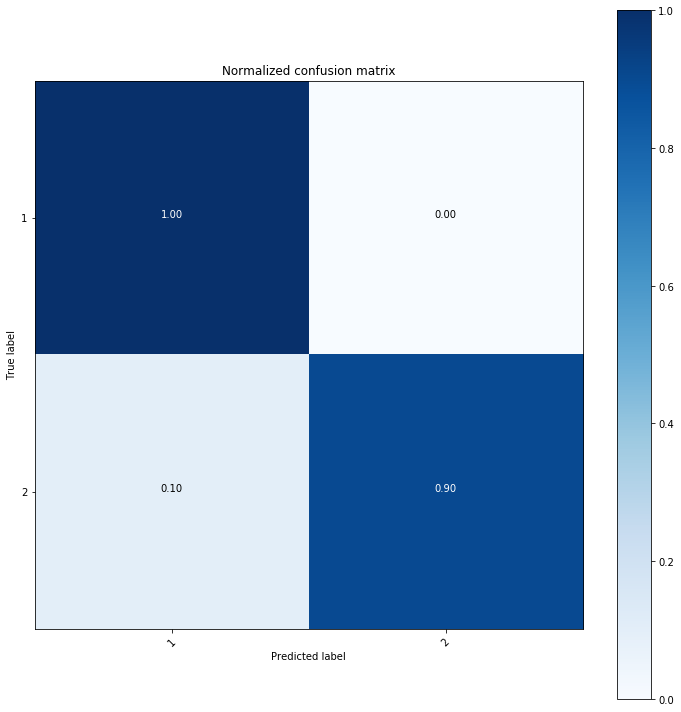

predicting 2 performance


100%|██████████| 361/361 [00:32<00:00, 11.25it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.97802198 0.02197802]
 [0.16666667 0.83333333]]


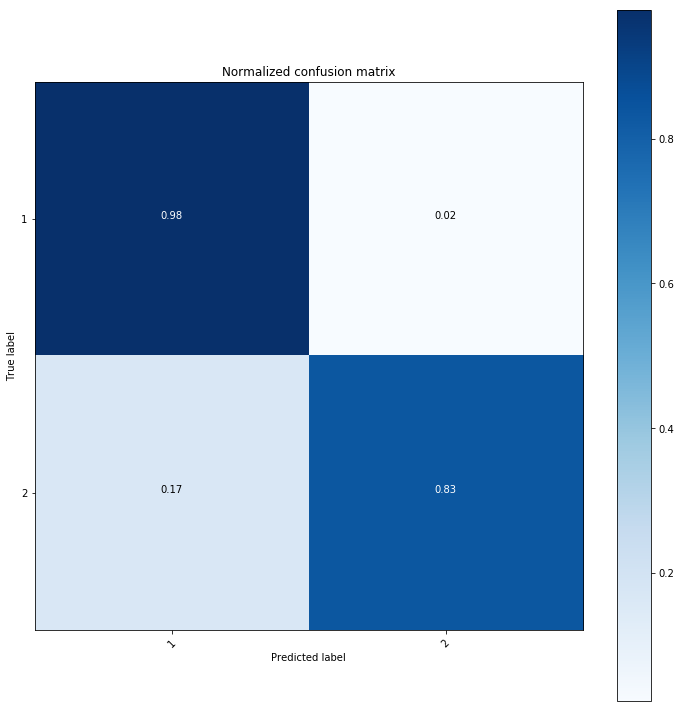

predicting 3 performance


100%|██████████| 361/361 [00:32<00:00, 11.06it/s]


============ prediction arm ============
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


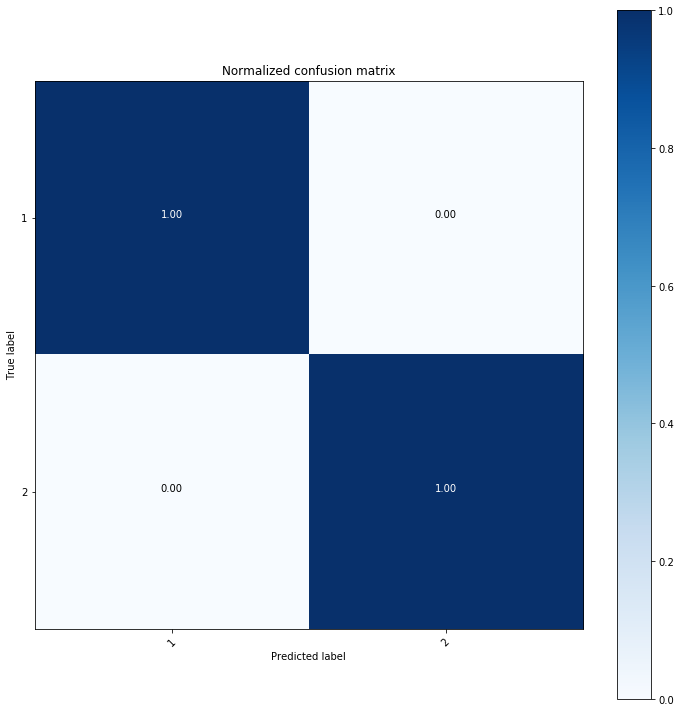

!!!!!!!!! test 3-th drumer !!!!!!!!!!!!
[[ 0.04226302 -0.19068196 -0.0141187  ... -0.0595105   0.86027278
  -0.87377011]
 [-0.01260815 -0.19675205 -0.07433951 ...  1.13502747 -1.53789036
  -1.75704721]
 [ 0.0279072  -0.19749322 -0.05791566 ... -1.0946631   0.39777437
  -1.66806242]
 ...
 [-0.39040853 -0.19627838 -0.36449436 ... -1.30829738 -1.53789036
   0.86165813]
 [-0.28406043 -0.19761216 -0.28276611 ... -0.63896406  0.71881253
  -1.59742757]
 [-0.05388104 -0.19642415 -0.01294557 ...  1.13502747  0.9368472
   0.86165813]]


100%|██████████| 361/361 [00:32<00:00, 11.00it/s]

let's go centroid=50, C=100.00 @@@@@@@@@@@@@@@
predicting 1 performance



100%|██████████| 361/361 [00:32<00:00, 10.95it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.98901099 0.01098901]
 [0.46666667 0.53333333]]


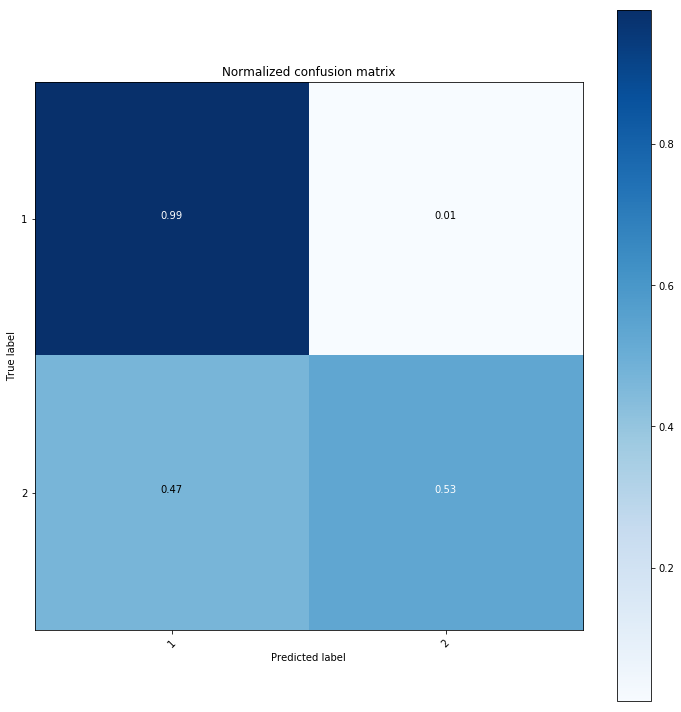

predicting 2 performance


100%|██████████| 361/361 [00:30<00:00, 11.75it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.98901099 0.01098901]
 [0.73333333 0.26666667]]


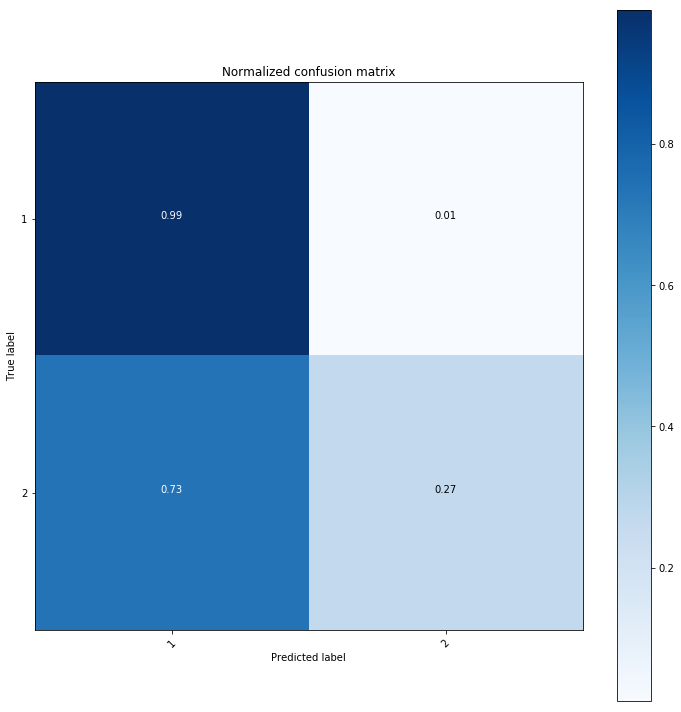

predicting 3 performance


100%|██████████| 361/361 [00:32<00:00, 10.98it/s]

============ prediction arm ============
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


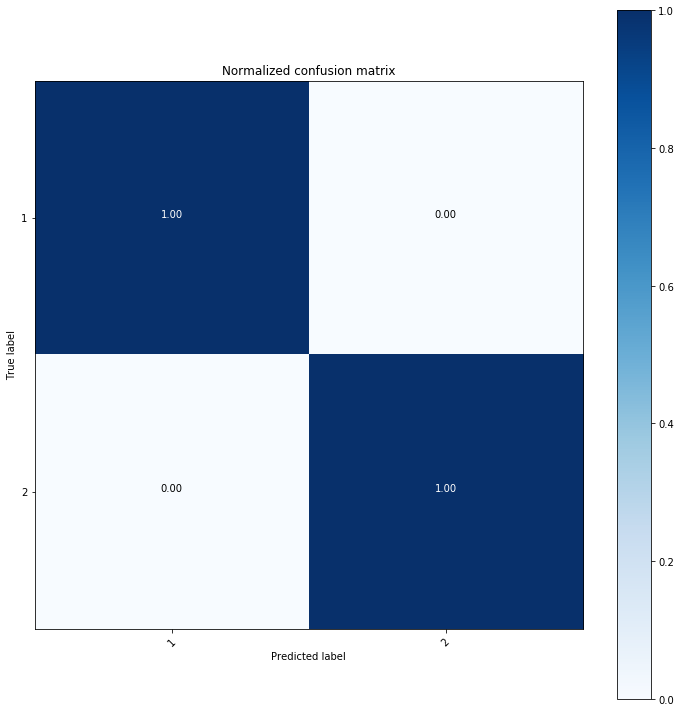

!!!!!!!!! test 4-th drumer !!!!!!!!!!!!
[[ 1.15770436 -0.21417222  0.91349129 ...  0.24637501  0.66629621
  -0.50617455]
 [ 1.14431738 -0.21427466  0.89044047 ...  0.65637399  0.27266787
   0.90057854]
 [ 1.15317392 -0.21424413  0.9004762  ...  1.19412238  0.75894461
   0.90866242]
 ...
 [ 1.06960424 -0.2009443   1.18712181 ... -1.22028137 -1.66295148
   0.54578533]
 [ 0.9505044  -0.21332384  0.84026181 ...  1.18640162 -1.52121293
  -1.2195869 ]
 [ 0.81552188 -0.21382992  0.69944794 ...  1.15476915  0.71373866
   0.77197248]]


100%|██████████| 361/361 [00:33<00:00, 10.79it/s]

let's go centroid=50, C=100.00 @@@@@@@@@@@@@@@
predicting 1 performance



100%|██████████| 361/361 [00:33<00:00, 10.89it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.         1.        ]
 [0.26666667 0.73333333]]


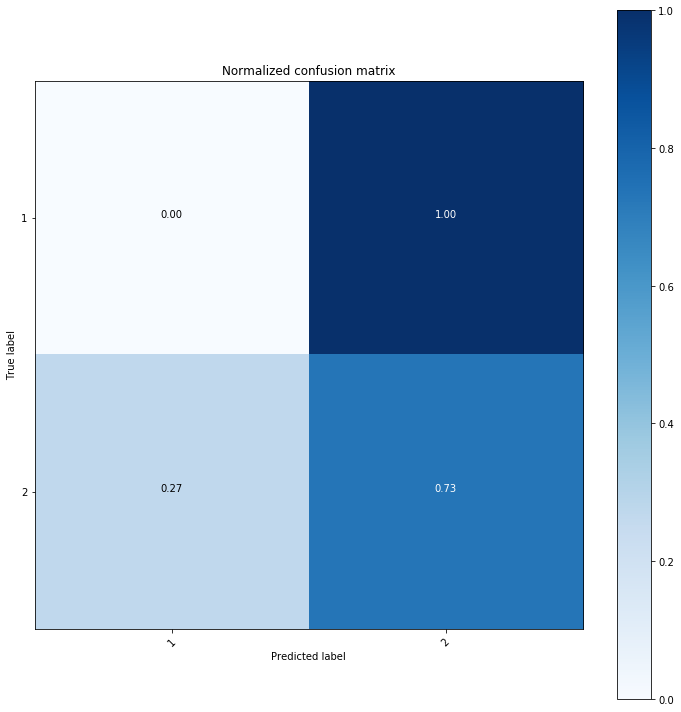

predicting 2 performance


100%|██████████| 361/361 [00:32<00:00, 11.03it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.98901099 0.01098901]
 [0.1        0.9       ]]


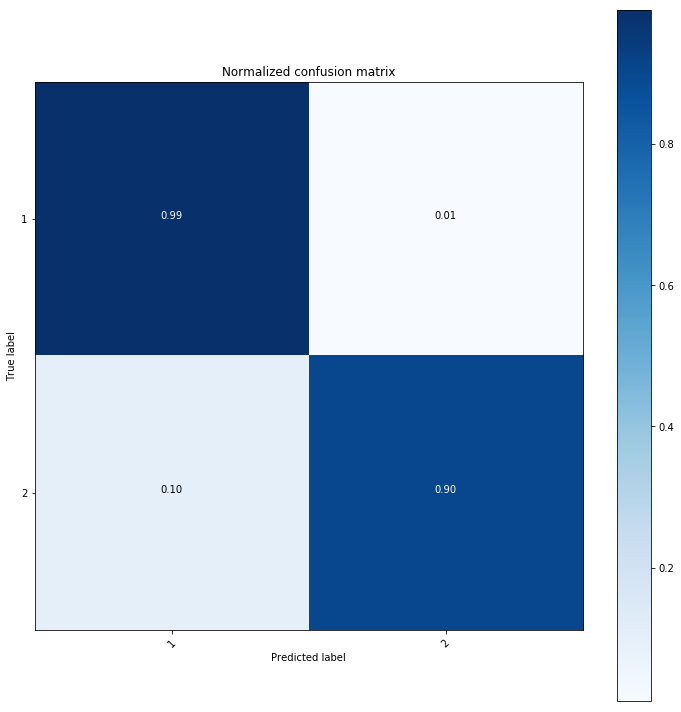

predicting 3 performance


100%|██████████| 361/361 [00:32<00:00, 11.16it/s]


============ prediction arm ============
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


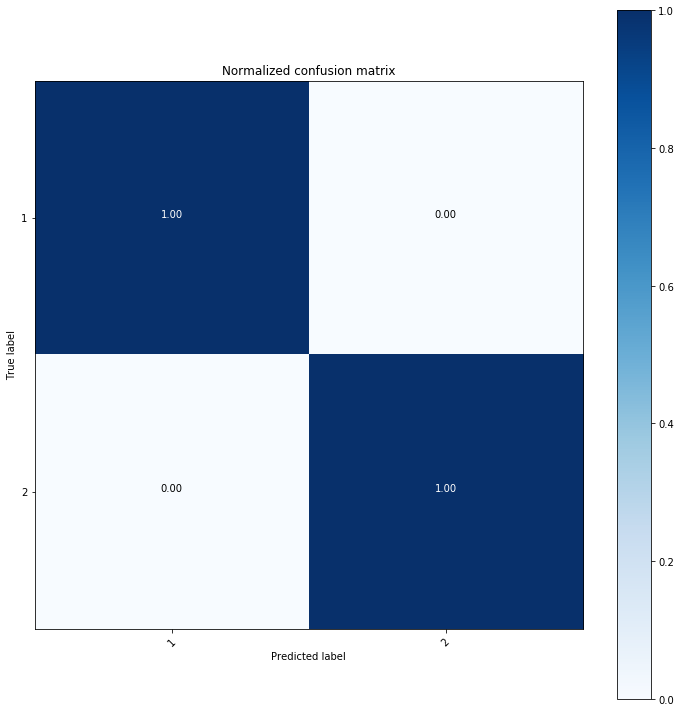

!!!!!!!!! test 5-th drumer !!!!!!!!!!!!
[[-0.43732455 -0.35782688 -0.39192849 ... -1.11845344 -0.83796972
   0.41048268]
 [-0.37620928 -0.35916836 -0.32999373 ... -0.88175642  1.24217843
  -1.46457738]
 [-0.46360273 -0.35151494 -0.41130473 ... -0.74037457  0.74911387
  -0.15608125]
 ...
 [ 1.07698725 -0.35757451  0.83431052 ... -0.68602496  1.2073897
  -1.43733838]
 [ 1.08128534 -0.35966393  0.81701031 ...  0.23206291  0.33481144
  -1.60413184]
 [ 1.040847   -0.36052848  0.78240988 ...  1.2647034  -1.12025935
  -1.69078799]]


100%|██████████| 361/361 [00:32<00:00, 11.12it/s]

let's go centroid=50, C=100.00 @@@@@@@@@@@@@@@
predicting 1 performance



100%|██████████| 361/361 [00:32<00:00, 11.05it/s]

============ prediction arm ============
Normalized confusion matrix
[[1.         0.        ]
 [0.26666667 0.73333333]]


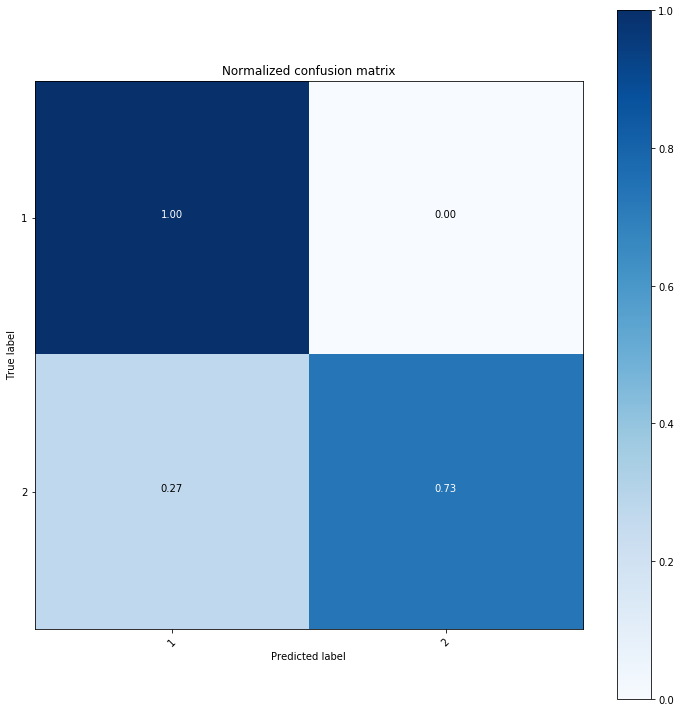

predicting 2 performance


100%|██████████| 361/361 [00:32<00:00, 11.04it/s]

============ prediction arm ============
Normalized confusion matrix
[[0.96703297 0.03296703]
 [0.13333333 0.86666667]]


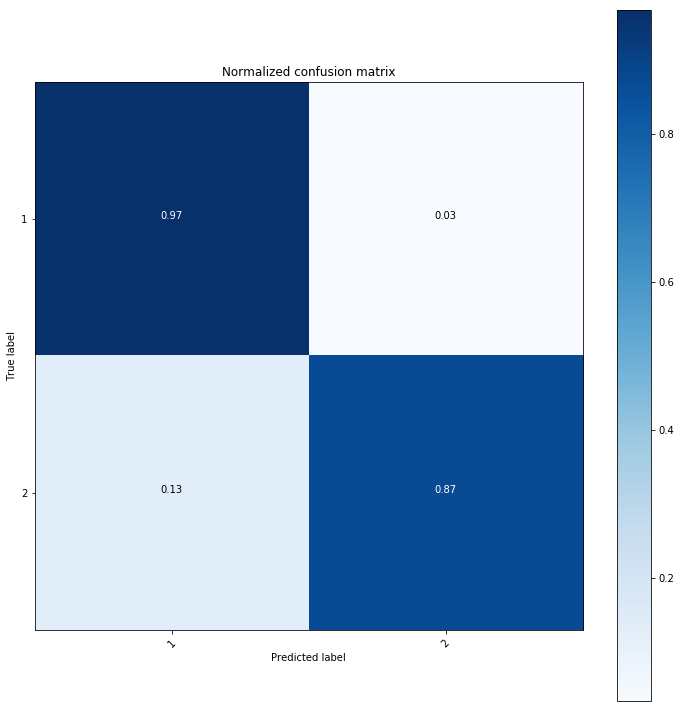

predicting 3 performance


100%|██████████| 361/361 [00:32<00:00, 11.15it/s]


============ prediction arm ============
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


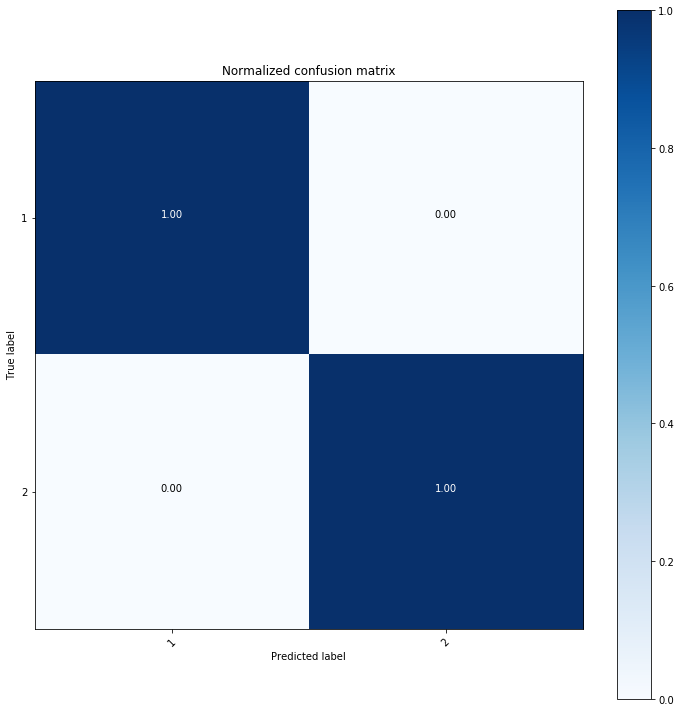

!!!!!!!!! test 6-th drumer !!!!!!!!!!!!
[[ 2.42605029 -0.09027537  2.11913592 ...  1.02971023 -1.05421322
  -1.89913327]
 [ 0.14215254 -0.11404702  0.19781159 ... -1.18633545 -1.08042841
   0.70574625]
 [ 0.74329821 -0.23560491  0.77646927 ...  1.06685633 -0.2670503
  -0.10630236]
 ...
 [ 0.4761744  -0.25728296  0.60241989 ... -1.1598618   1.21375085
  -1.91960488]
 [ 0.47634568 -0.25689516  0.61447526 ... -0.34514294  1.25436475
  -1.12195535]
 [ 0.48590555 -0.2563179   0.59789913 ...  1.15460482  0.46935426
   0.42037709]]


100%|██████████| 361/361 [00:32<00:00, 11.02it/s]

let's go centroid=50, C=100.00 @@@@@@@@@@@@@@@
predicting 1 performance



100%|██████████| 361/361 [00:32<00:00, 11.14it/s]

============ prediction arm ============
Normalized confusion matrix
[[1.  0. ]
 [0.4 0.6]]


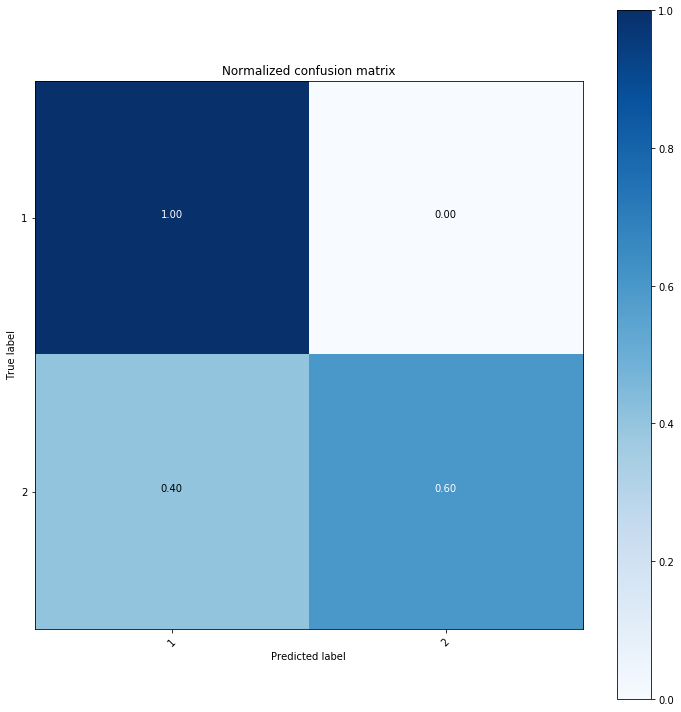

predicting 2 performance


100%|██████████| 361/361 [00:32<00:00, 11.06it/s]


============ prediction arm ============
Normalized confusion matrix
[[1.         0.        ]
 [0.23333333 0.76666667]]


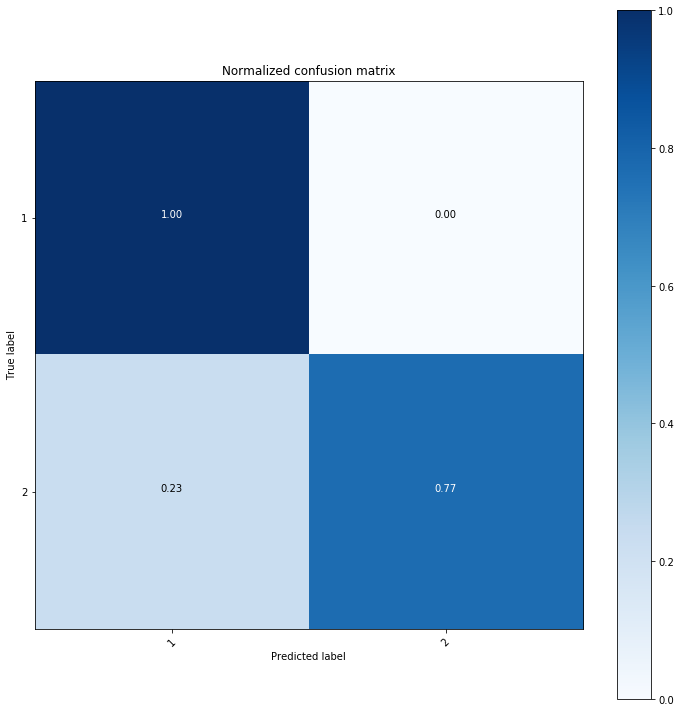

predicting 3 performance


100%|██████████| 361/361 [00:32<00:00, 11.15it/s]

============ prediction arm ============
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


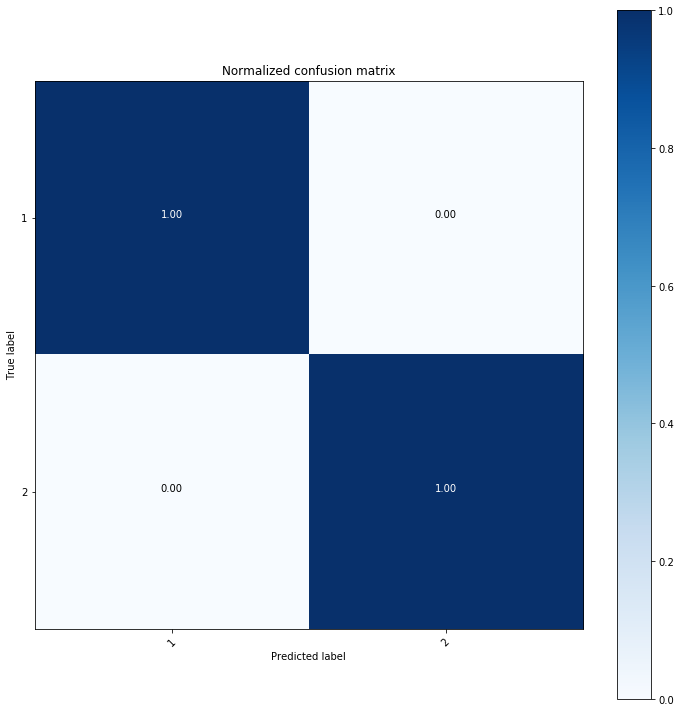

!!!!!!!!! test 7-th drumer !!!!!!!!!!!!
[[ 0.55319112 -0.24845097  0.72208545 ... -0.98372621 -0.99169862
  -0.33649876]
 [ 0.56441695 -0.24471314  0.7505801  ... -0.49559621  0.22682079
  -1.60280209]
 [ 0.607353   -0.24633648  0.80946905 ... -0.73803913  0.48973102
  -1.6923352 ]
 ...
 [-0.29600925 -0.24911505 -0.27237792 ... -1.13764492  0.17218706
  -0.82507257]
 [-0.25893476 -0.23779728 -0.26098006 ...  0.47017333 -0.37344907
  -1.57084167]
 [-0.33346792 -0.24629658 -0.34076509 ... -1.10698237  0.87142088
  -1.6658392 ]]


100%|██████████| 361/361 [00:32<00:00, 11.13it/s]

let's go centroid=50, C=100.00 @@@@@@@@@@@@@@@
predicting 1 performance



100%|██████████| 361/361 [00:32<00:00, 11.11it/s]


============ prediction arm ============
Normalized confusion matrix
[[1.  0. ]
 [0.3 0.7]]


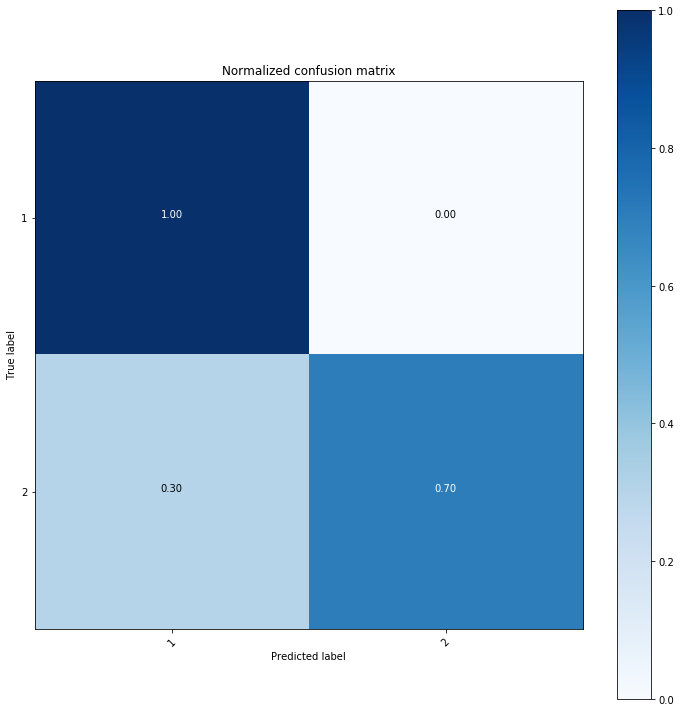

predicting 2 performance


100%|██████████| 361/361 [00:32<00:00, 11.09it/s]

============ prediction arm ============
Normalized confusion matrix
[[1.         0.        ]
 [0.33333333 0.66666667]]


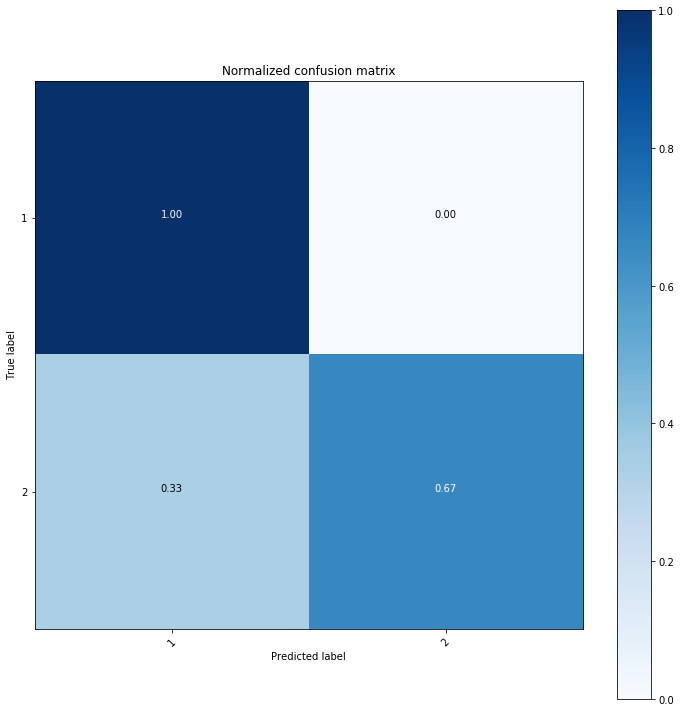

predicting 3 performance


100%|██████████| 361/361 [00:32<00:00, 11.07it/s]

============ prediction arm ============
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


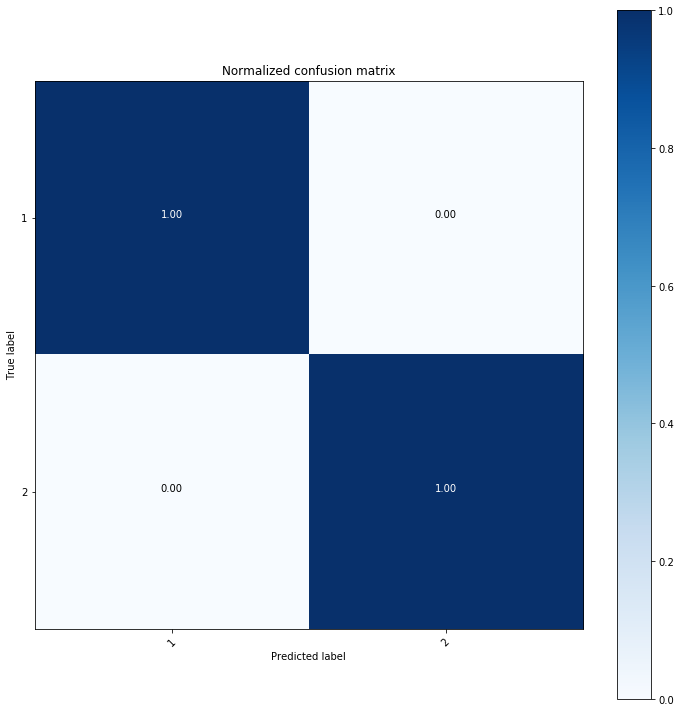

!!!!!!!!! test 8-th drumer !!!!!!!!!!!!
[[-0.44526085 -0.22687081 -0.45740461 ...  1.19010135 -1.49504364
  -1.70291656]
 [-0.59482231 -0.22221169 -0.60603443 ... -0.81872868  0.18326969
  -1.62600284]
 [-0.53517546 -0.22392077 -0.54081931 ... -1.15378865 -0.47706491
   0.23441448]
 ...
 [ 0.19910815 -0.19105143  0.0741745  ... -0.92815527 -1.25286635
   0.86510277]
 [ 0.04330881 -0.22385584 -0.07369701 ...  0.99149062  0.22341756
   0.65835004]
 [ 0.25907303 -0.22625048  0.16062246 ...  1.19010135 -1.49504364
  -1.70291656]]


100%|██████████| 361/361 [00:32<00:00, 11.27it/s]

let's go centroid=50, C=100.00 @@@@@@@@@@@@@@@
predicting 1 performance



100%|██████████| 361/361 [00:32<00:00, 11.18it/s]

============ prediction arm ============
Normalized confusion matrix
[[0.02197802 0.97802198]
 [0.         1.        ]]


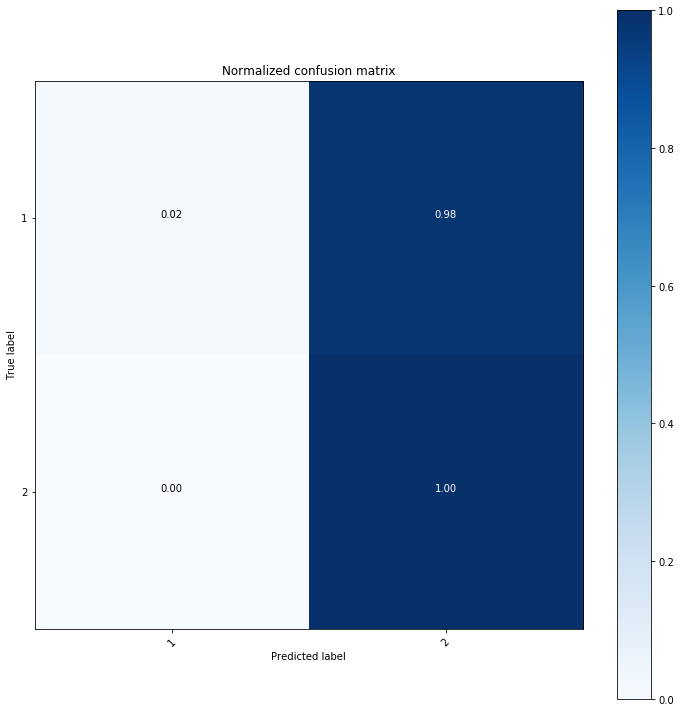

predicting 2 performance


100%|██████████| 361/361 [00:32<00:00, 11.03it/s]

============ prediction arm ============
Normalized confusion matrix
[[0.06593407 0.93406593]
 [0.         1.        ]]


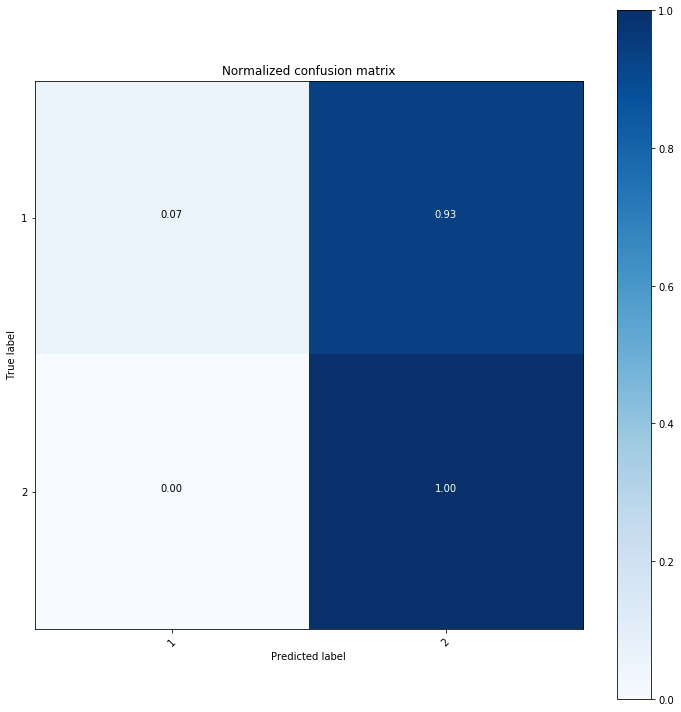

predicting 3 performance


100%|██████████| 361/361 [00:31<00:00, 11.45it/s]


============ prediction arm ============
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


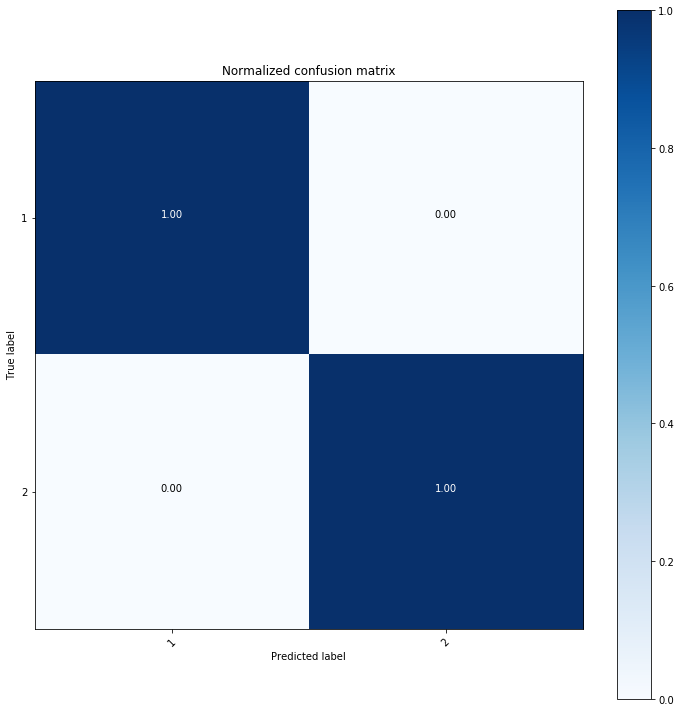

In [9]:
k = 50
C = 100

for drumer in range(1, 8 + 1):
    print('!!!!!!!!! test %d-th drumer !!!!!!!!!!!!' % drumer)
    model = Model(k_centroid=k, tolerance=C)
    model.fit(pfs[drumer - 1][TRAIN_ORDER - 1])
    print('let\'s go centroid=%d, C=%.2f @@@@@@@@@@@@@@@' % (k, C))
    for od in range(len(pfs[drumer - 1])):
        print('predicting %d performance' % (od + 1))
        pred_y, y = model.predict(pfs[drumer - 1][od])
        print('============ prediction arm ============')
        cutstom_output_cnf_matrix(y, pred_y)